# Visualization

In [1]:
#imported python packages
import os
import math
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import glob
import functools
import datetime

In [2]:
# import dataset about train dataset and sample_submission
train = pd.read_csv("train.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   segment_id        4431 non-null   int64
 1   time_to_eruption  4431 non-null   int64
dtypes: int64(2)
memory usage: 69.4 KB


,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


In [4]:
sample_submission.info()
sample_submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   segment_id        4520 non-null   int64
 1   time_to_eruption  4520 non-null   int64
dtypes: int64(2)
memory usage: 70.8 KB


,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0
...,...,...
4515,996704281,0
4516,997630809,0
4517,998072137,0
4518,998136924,0


In [5]:
# created dataframe about the testing volcanos id
test_data = pd.DataFrame([os.path.basename(f)[:-4] for f in glob.glob('test/*')], columns=["segment_id"])


In [6]:
test_data.info()
test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segment_id  730 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


,segment_id
0,19158067
1,146639315
2,53465103
3,638074752
4,106558646
...,...
725,1265147
726,115078097
727,577108378
728,108980580


In [7]:
# created dataframe about the training volcanos id
train_data = pd.DataFrame([os.path.basename(f)[:-4] for f in glob.glob('train/*')], columns=["segment_id"])

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segment_id  759 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [9]:
train_data

,segment_id
0,117864846
1,198187683
2,19334151
3,164402661
4,224267098
...,...
754,1912467905
755,140348256
756,442836719
757,88594602


In [10]:
# sorted values depending on the time_to_eruption
train = train.sort_values("time_to_eruption",ascending=False)
train

,segment_id,time_to_eruption
1139,1923243961,49046087
3509,1552761888,48814294
3589,356854390,48727004
3739,1131527270,48522449
4132,1162128945,48387290
...,...,...
1724,1626437563,40492
413,442994108,28696
1145,1957235969,26929
2709,1658693785,25730


## Attempting to recognize the trends and understand the data for data modeling

In [11]:
# display the max and min id of volcanoes in train_data
display(train_data.iloc[[0,-1],:])

max_id = 117864846
min_id =  32792883

,segment_id
0,117864846
758,32792883


In [12]:
# imported the max_id volcano dataset from train file
df = pd.read_csv(f'train/{max_id}.csv')

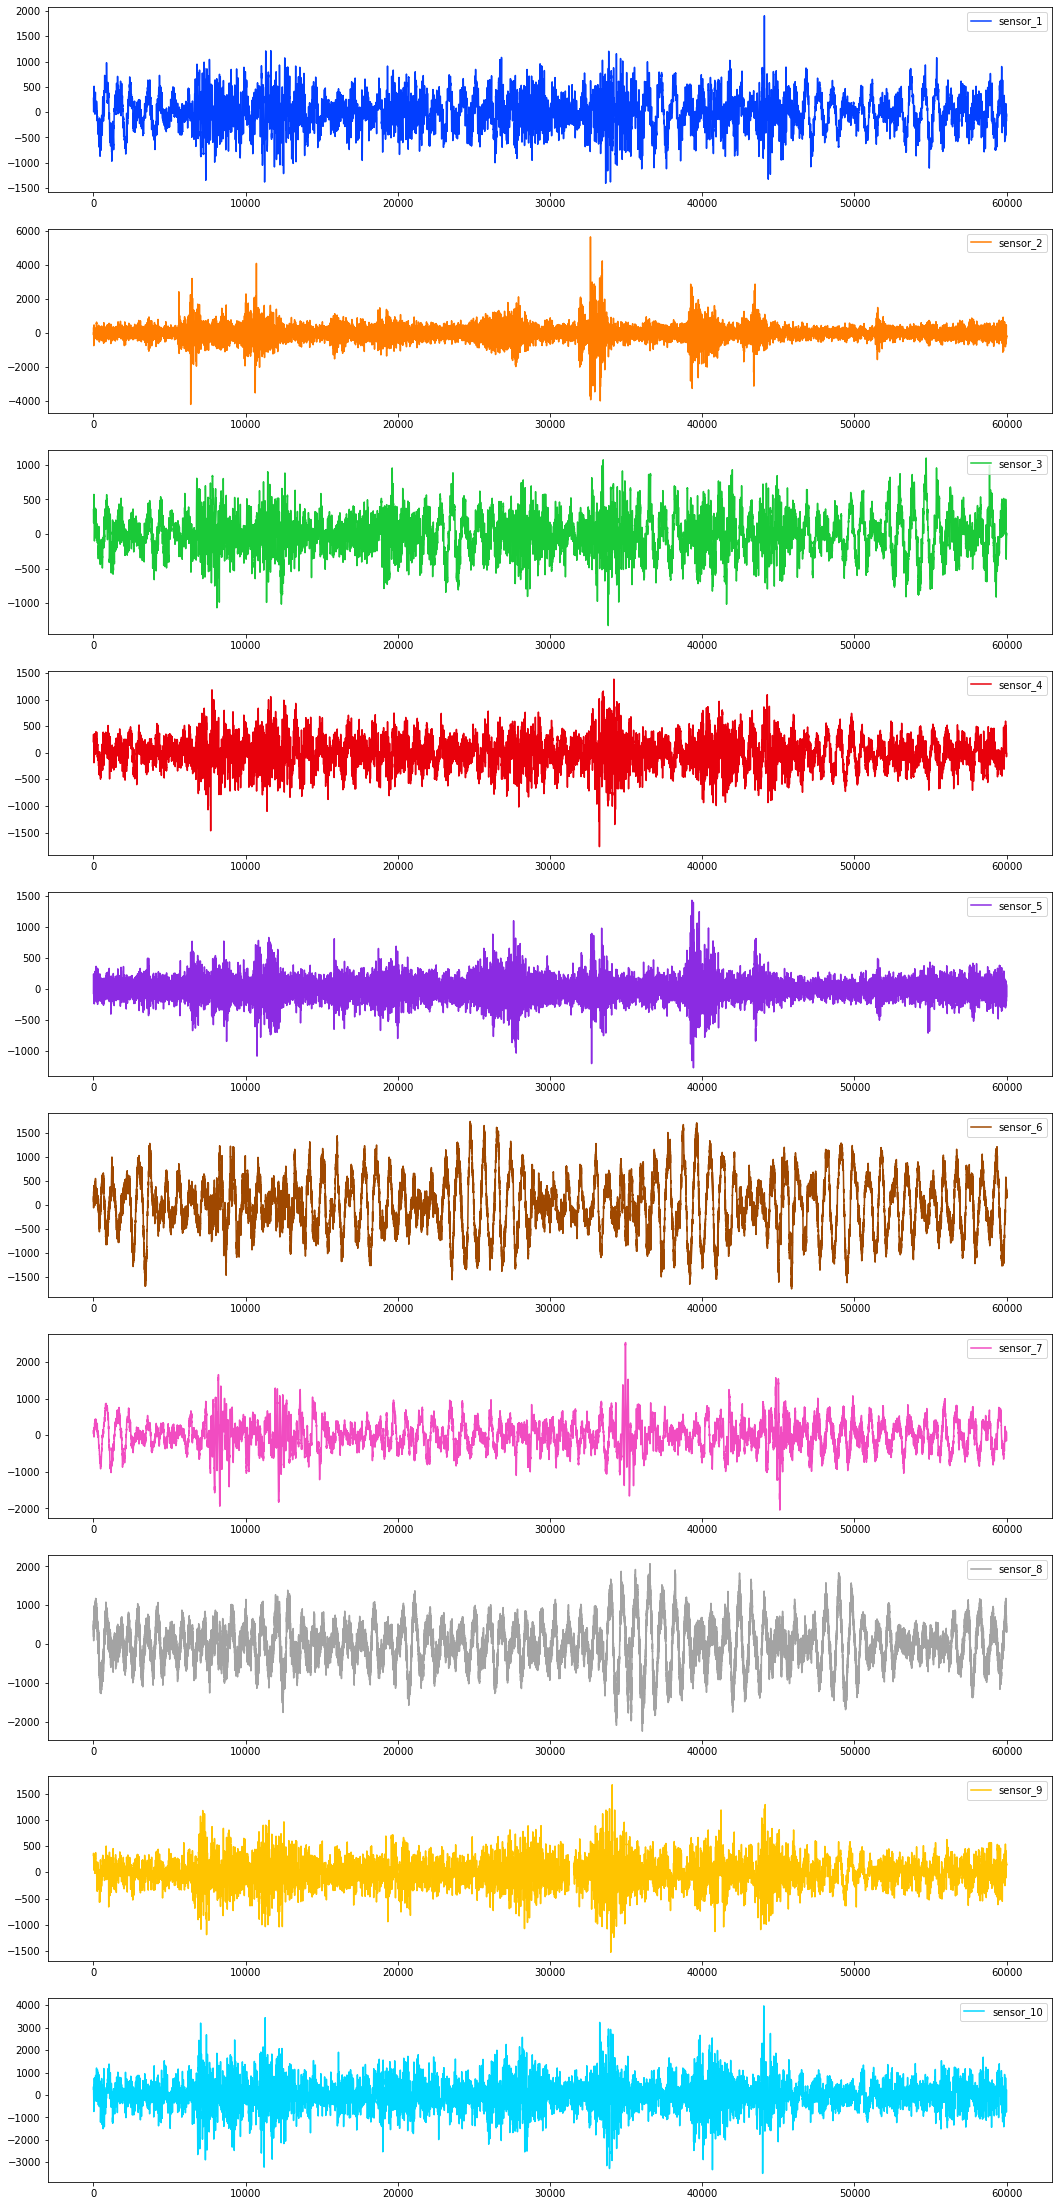

In [13]:
# plot the max_id volcano sensor data
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(18, 40))
for i in range(10):
    df["sensor_"+str(i+1)].plot(ax=axes[i], color=sns.color_palette("bright", n_colors=10)[i])
    axes[i].legend(loc="upper right")

plt.show()

### All of the sensors respond to the volcano showing different variations in each of them. Majority of them show large variation between 30000 to 40000.

In [14]:
# imported the min_id volcano dataset from train file
df = pd.read_csv(f'train/{min_id}.csv')

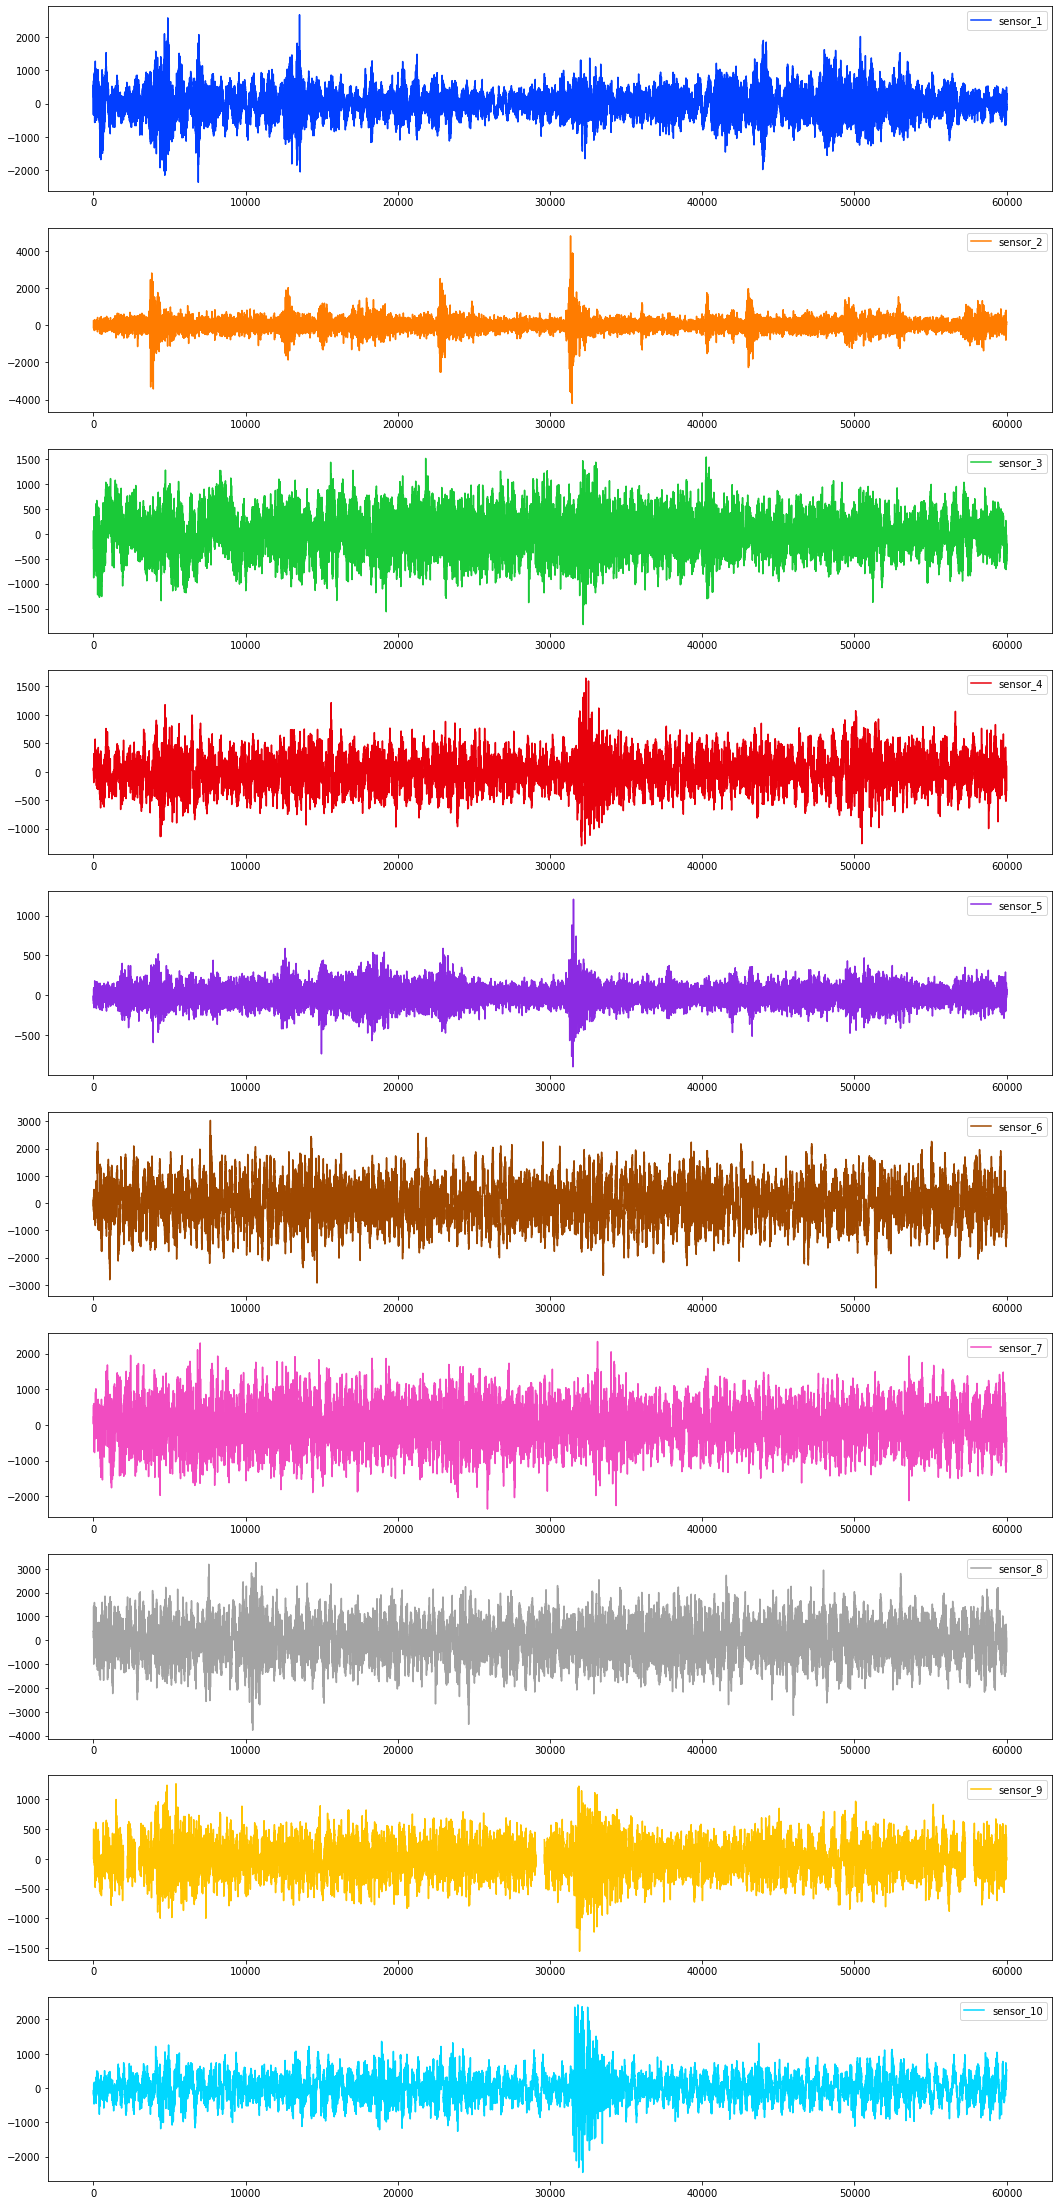

In [15]:
# plot the min_id volcano sensor data
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(18, 40))
for i in range(10):
    df["sensor_"+str(i+1)].plot(ax=axes[i], color=sns.color_palette("bright", n_colors=10)[i])
    axes[i].legend(loc="upper right")

plt.show()

### All of the sensors respond to the volcano showing different variations in each of them. Majority of them show large variation little over 30000.

In [16]:
# imported a volcano dataset from train file
df = pd.read_csv(f'train/{19334151}.csv')

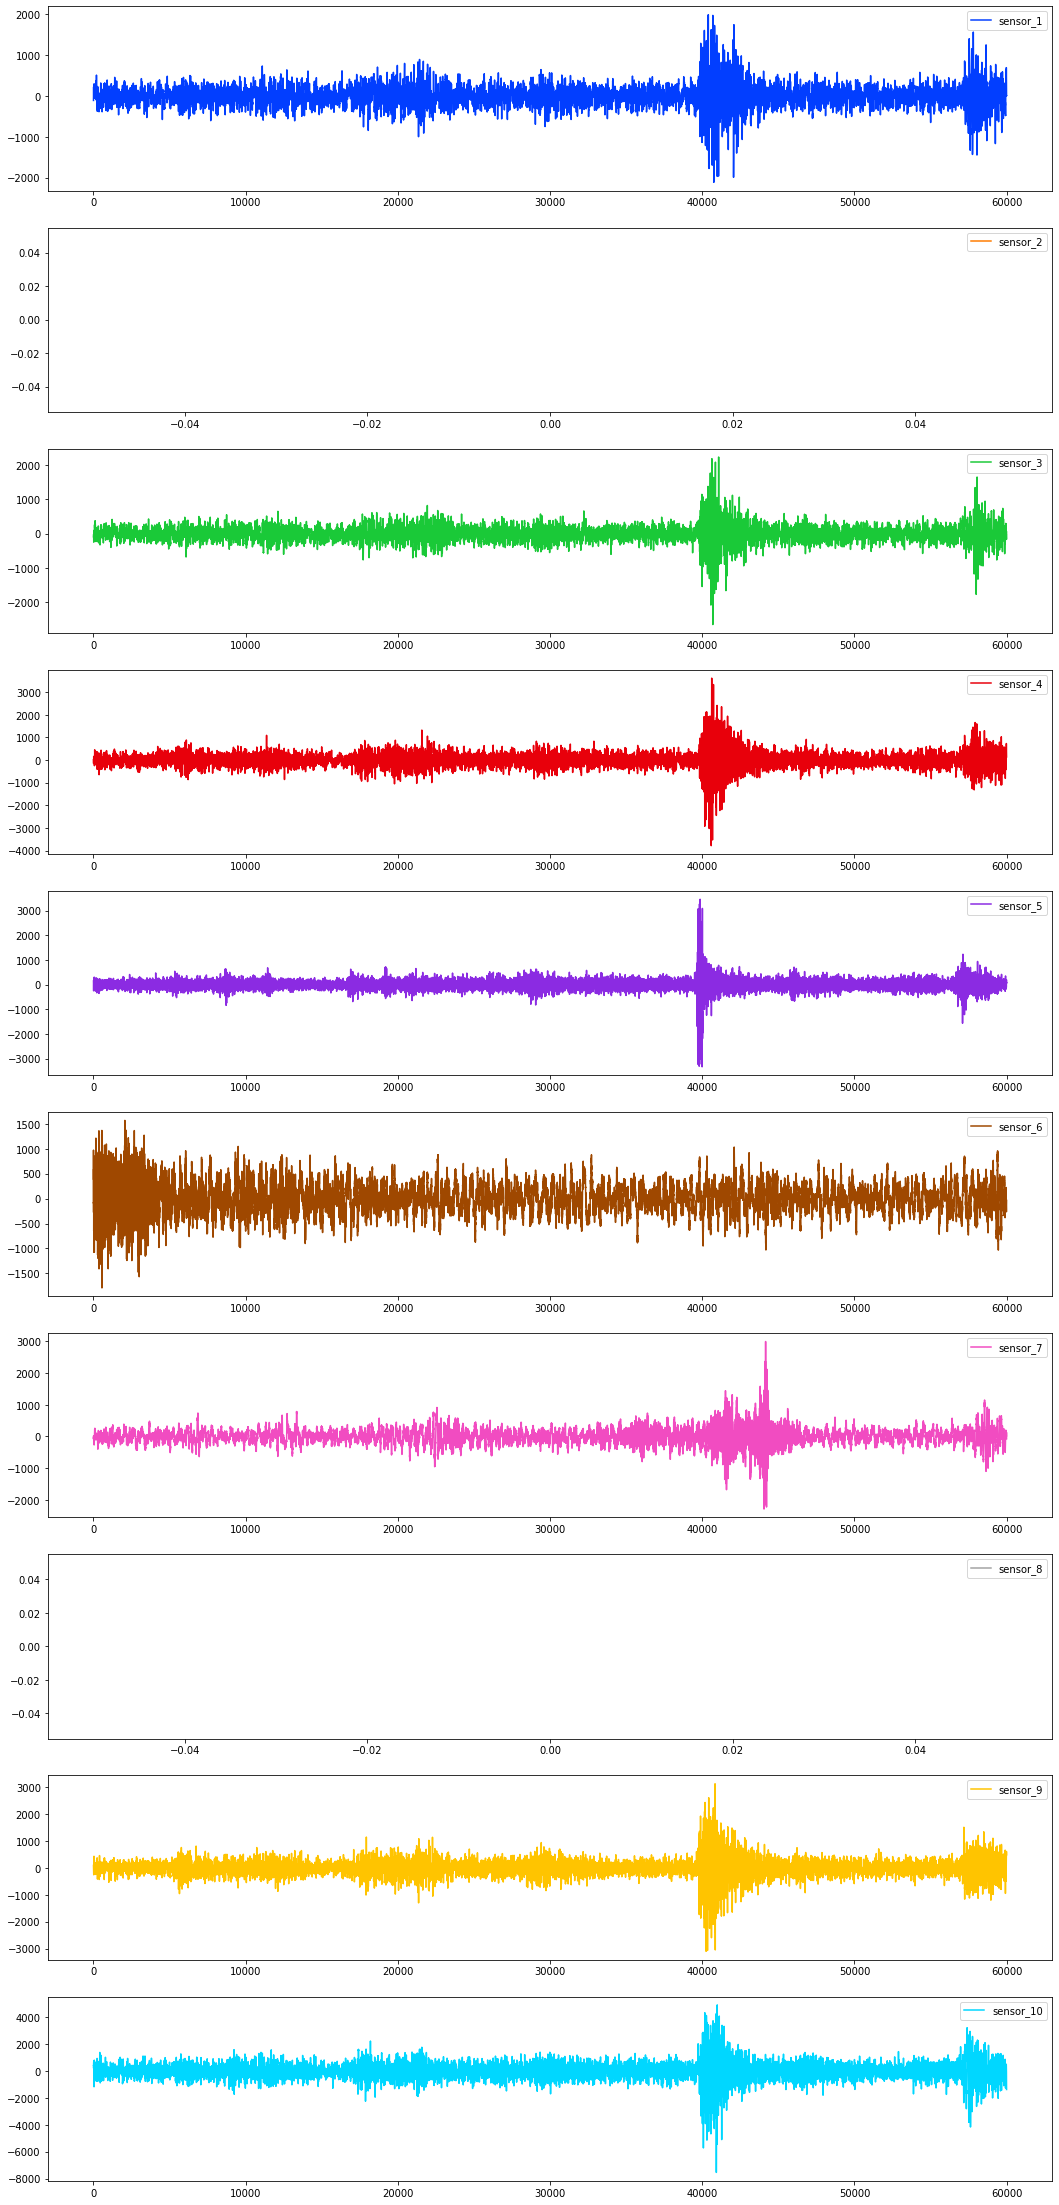

In [17]:
# plot the volcano sensor data
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(18, 40))
for i in range(10):
    df["sensor_"+str(i+1)].plot(ax=axes[i], color=sns.color_palette("bright", n_colors=10)[i])
    axes[i].legend(loc="upper right")

plt.show()

### Sensor 2 and 8 don't respond or have no data for the volcano. Majority of the other sensors show large variation around 40000.

### Thus, to make a better model features like the minimum, maximum, median, mean etc. features from each sensors have been extracted in the final training and test dataset.

<Figure size 1368x648 with 0 Axes>

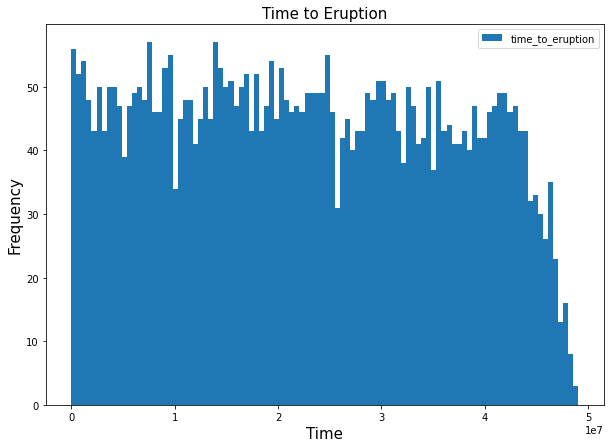

In [18]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
train[["time_to_eruption"]].plot(kind="hist",bins=100,figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("Time to Eruption",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

### Overall the distribution of the time_to_eruption looks uniform. With exception of few volcanoes taking a longer period of time at the end of the distribution.

In [19]:
# created a function to find the missing values
def get_missing(seg):
    # Format seg and read csv
    seg = str(seg)
    try:
        seg_df = pd.read_csv(f'train/{seg}.csv')
    except FileNotFoundError:
        seg_df = pd.read_csv(f'test/{seg}.csv')
    
    #print(seg)
    return seg_df.isnull().sum().rename(seg)

In [20]:
# created a dataset with missing data in sensors for train data using get_missing()
train_missing_sensors = train_data['segment_id'].apply(get_missing)

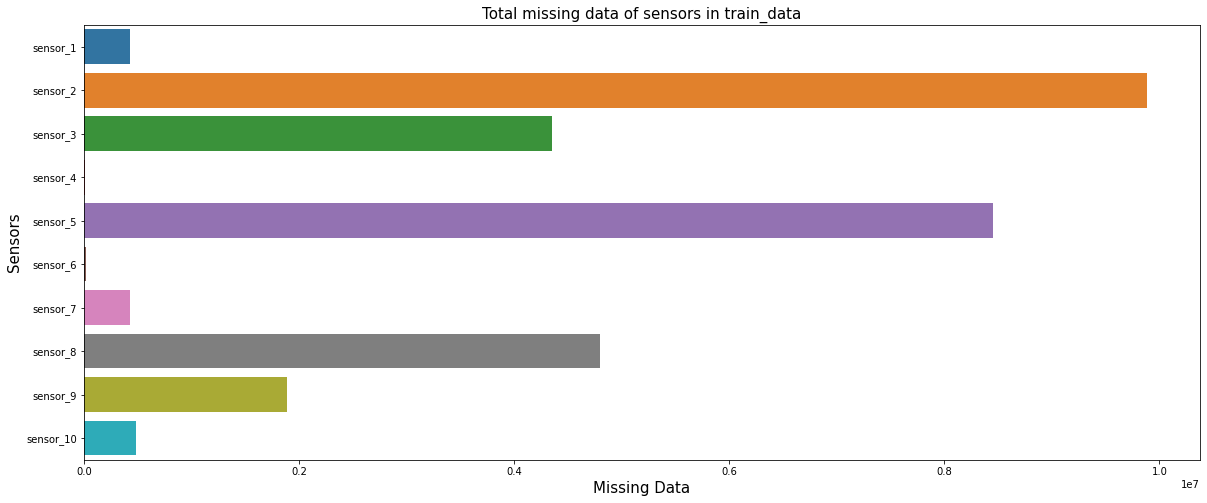

In [21]:
# histogram plot for train_missing_sensors
plt.figure(figsize=(20,8))
sns.barplot(y = train_missing_sensors.columns, x = train_missing_sensors.sum())
# GRAPH Title, x-axis label, y-axis label 
plt.title("Total missing data of sensors in train_data",fontsize=15)
plt.xlabel("Missing Data",fontsize=15)
plt.ylabel("Sensors",fontsize=15)
plt.show()

### There are a lot of senosrs with missing data with sensor 2 being the highest. Thus, NAN values has been taken care of in preprocess for train_data for better modeling.


In [22]:
# created a dataset with missing data in sensors for test data using get_missing()
test_missing_sensors = test_data['segment_id'].apply(get_missing)

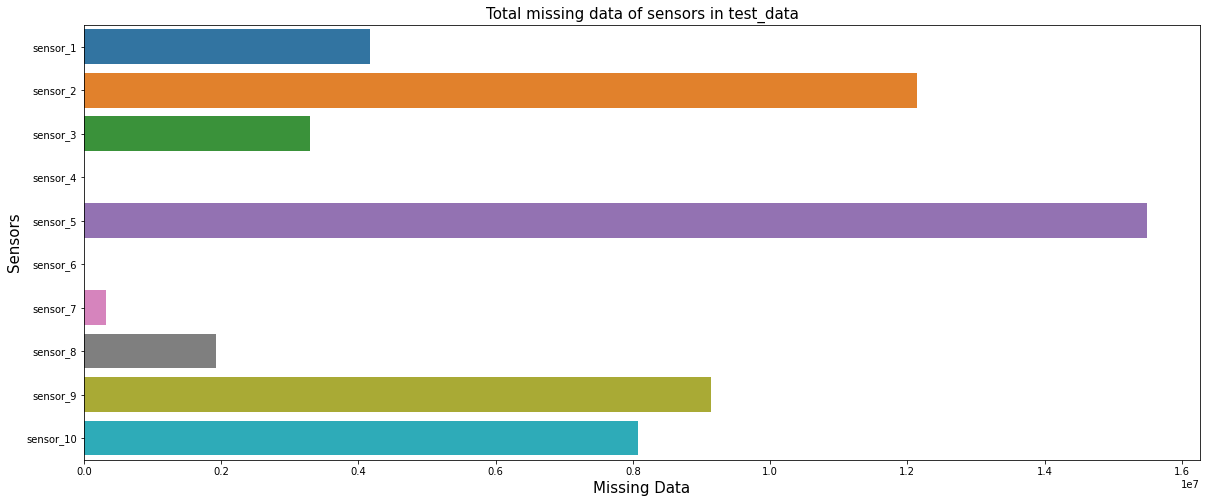

In [23]:
# histogram plot for test_missing_sensors
plt.figure(figsize=(20,8))
sns.barplot(y = test_missing_sensors.columns, x = test_missing_sensors.sum())
# GRAPH Title, x-axis label, y-axis label 
plt.title("Total missing data of sensors in test_data",fontsize=15)
plt.xlabel("Missing Data",fontsize=15)
plt.ylabel("Sensors",fontsize=15)
plt.show()

### There are a lot of senosrs with missing data with sensor 5 being the highest. Thus, NAN values has been taken care of in preprocess for test_data for better modeling.

## Following graphs show that there is skewness in some extracted features. We will solve this problem by Sclaling them in Model notebook to get better model prediction.

In [36]:
# import dataset about train dataset 
train_df = pd.read_csv("train_df.csv")

In [38]:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 582 entries, segment_id to sensor_10_abs_1500_max
dtypes: float64(580), int64(2)
memory usage: 3.4 MB


,segment_id,time_to_eruption,sensor_1_mad,sensor_2_mad,sensor_3_mad,sensor_4_mad,sensor_5_mad,sensor_6_mad,sensor_7_mad,sensor_8_mad,...,sensor_1_abs_1500_max,sensor_2_abs_1500_max,sensor_3_abs_1500_max,sensor_4_abs_1500_max,sensor_5_abs_1500_max,sensor_6_abs_1500_max,sensor_7_abs_1500_max,sensor_8_abs_1500_max,sensor_9_abs_1500_max,sensor_10_abs_1500_max
0,1064935255,47950543,427.776378,623.697210,341.073573,433.849701,289.211797,764.413905,44.183687,68.358305,...,22922.0,21691.0,10264.000000,9915.0,46270.0,23693.0,47421.0,1260.0,9606.0,22251.0
1,1323724621,47861879,257.130834,471.174757,215.762815,219.545632,141.919199,640.298186,261.960275,482.226406,...,27299.0,25259.0,26185.000000,25994.0,25354.0,50804.0,19320.0,55973.0,25736.0,25739.0
2,1581535482,47810569,493.354956,207.232992,171.991627,284.738940,79.524836,1770.305228,467.666062,688.694534,...,8187.0,56897.0,35346.400000,8595.0,12648.0,57834.0,8640.0,9252.0,8909.0,38587.0
3,594908465,47775708,518.765458,705.686148,432.852295,452.531715,179.587543,1270.945471,44.843274,66.518934,...,42362.0,40367.0,41805.000000,2081.0,50579.0,11868.0,38611.0,49984.0,41854.0,51499.0
4,995669347,47715187,177.028725,224.951322,282.077704,211.051018,79.563309,623.316076,388.258728,484.273435,...,45312.0,57382.0,22462.000000,16902.0,17995.6,29837.0,39494.0,36672.0,22371.5,53085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,82371649,273119,632.813205,874.526694,675.669753,646.072554,237.954403,580.591656,553.386559,555.799454,...,24752.0,46245.0,49642.000000,49571.0,18261.0,31259.0,50917.0,36587.0,52567.0,18859.0
753,1301215104,223909,431.525120,703.002077,466.305727,330.091944,275.156617,283.346580,506.428935,316.107505,...,39574.0,59996.0,31919.000000,13284.0,18709.0,1800.0,58188.0,9677.0,39845.0,38291.0
754,372844561,179818,579.081600,842.940727,555.487845,549.747417,177.285175,1649.068075,799.161800,1121.988671,...,53022.0,54602.0,10317.000000,56921.0,22012.2,46310.0,57185.0,32599.0,55057.0,10479.0
755,442994108,28696,297.945463,366.545544,273.043050,267.871366,82.775953,377.133225,497.667999,607.939568,...,28322.5,12372.0,18943.666667,6870.5,12725.0,57079.0,49155.0,36264.0,13074.0,13146.0


In [26]:
# import dataset about test dataset
test_df = pd.read_csv("test_df.csv")

<Figure size 1368x648 with 0 Axes>

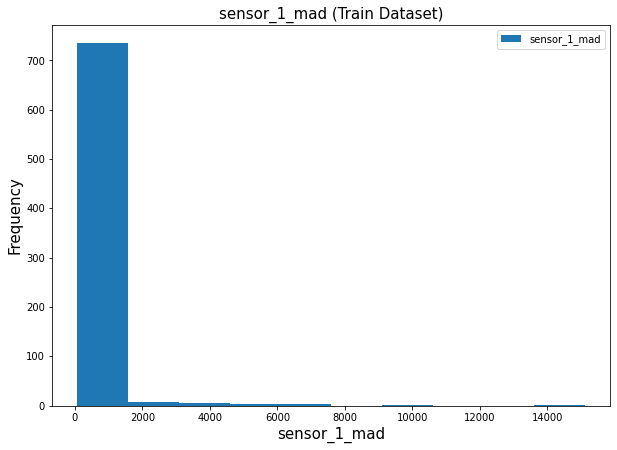

In [32]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
train_df[["sensor_1_mad"]].plot(kind="hist",figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("sensor_1_mad (Train Dataset)",fontsize=15)
plt.xlabel("sensor_1_mad",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

<Figure size 1368x648 with 0 Axes>

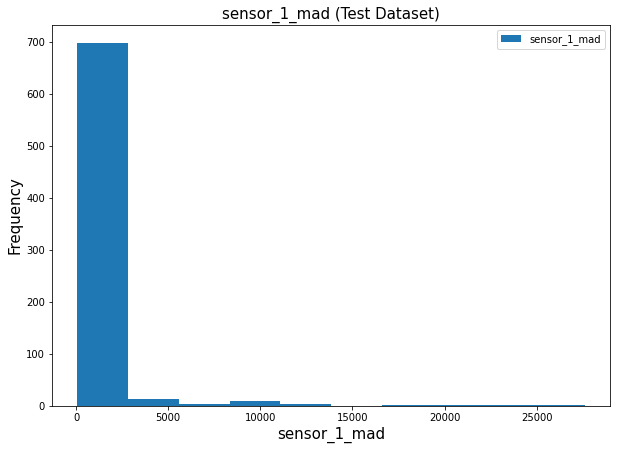

In [33]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
test_df[["sensor_1_mad"]].plot(kind="hist",figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("sensor_1_mad (Test Dataset)",fontsize=15)
plt.xlabel("sensor_1_mad",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

<Figure size 1368x648 with 0 Axes>

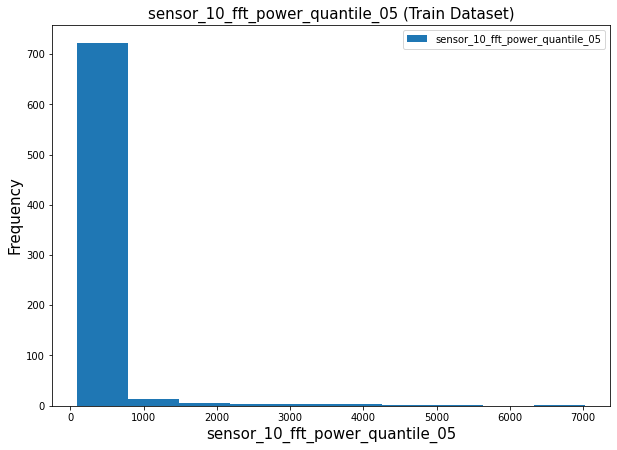

In [39]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
train_df[["sensor_10_fft_power_quantile_05"]].plot(kind="hist",figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("sensor_10_fft_power_quantile_05 (Train Dataset)",fontsize=15)
plt.xlabel("sensor_10_fft_power_quantile_05",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

<Figure size 1368x648 with 0 Axes>

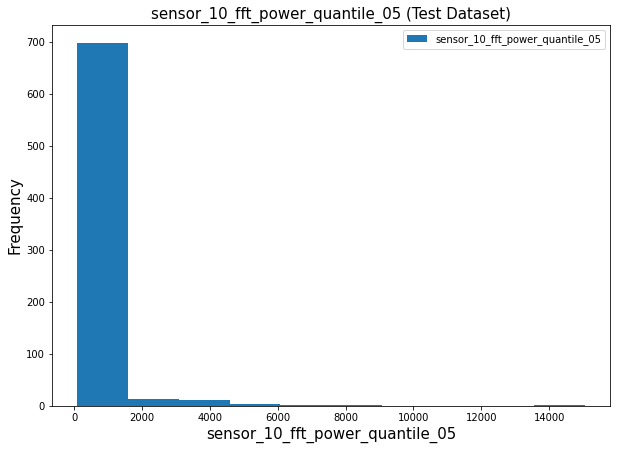

In [40]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
test_df[["sensor_10_fft_power_quantile_05"]].plot(kind="hist",figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("sensor_10_fft_power_quantile_05 (Test Dataset)",fontsize=15)
plt.xlabel("sensor_10_fft_power_quantile_05",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

<Figure size 1368x648 with 0 Axes>

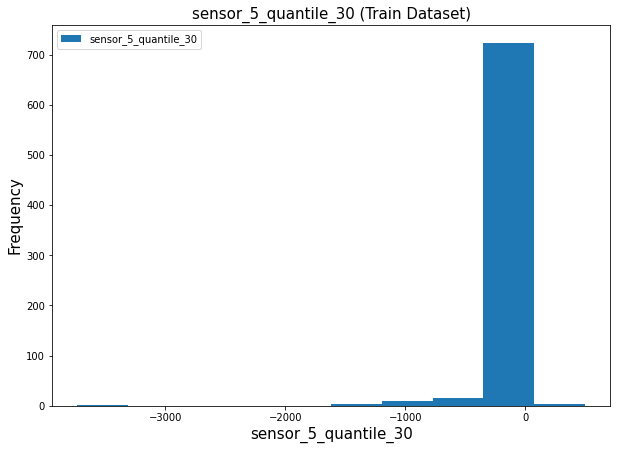

In [41]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
train_df[["sensor_5_quantile_30"]].plot(kind="hist",figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("sensor_5_quantile_30 (Train Dataset)",fontsize=15)
plt.xlabel("sensor_5_quantile_30",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

<Figure size 1368x648 with 0 Axes>

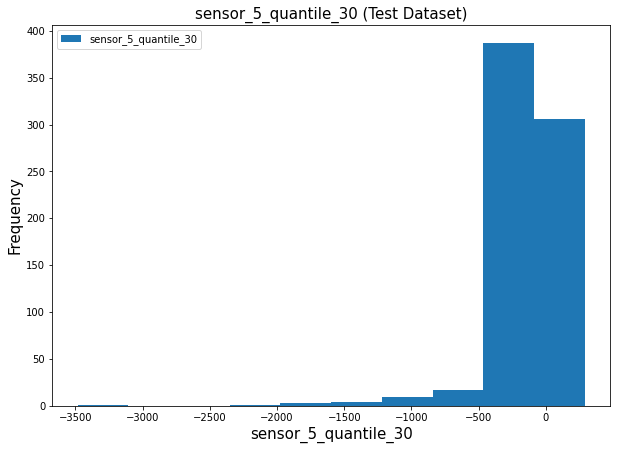

In [42]:
fig = plt.figure(figsize = (19,9))
# histogram plot of time_to_eruption
test_df[["sensor_5_quantile_30"]].plot(kind="hist",figsize=(10,7))
# GRAPH Title, x-axis label, y-axis label 
plt.title("sensor_5_quantile_30 (Test Dataset)",fontsize=15)
plt.xlabel("sensor_5_quantile_30",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()